In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [79]:
n = 500
d = 1000
k = 100
sigma = 1

#make w array
w = np.zeros(d)
for j in range(k):
    w[j] = j/k
    

x = np.random.normal(size=(n, d))
y = w @ x.T + np.random.normal(0, sigma, size=(n))

print("x shape", x.shape)
print("y shape", y.shape)

x shape (500, 1000)
y shape (500,)


In [91]:
def CDA(x, y, lam, delta = 10e-8):
    going = True
    (n,d) = x.shape
    w = np.ones((1,d))
    w_prev = np.copy(w)
    count = 0
    while going:
        b = np.mean(y - w@x.T)
        for k in range(d):
            ak = 2 * np.linalg.norm(x[:,k])**2
            ck = 0
            for i in range(n):
                summation = 0
                for j in range(d):
                    if j !=k:
                        summation += w[0,j] * x[i,j]
#                 print("summation = ", summation)
                ck += 2* x[i, k]*(y[i] - (b + summation)) 

            if(ck < -lam):
                w[0, k] = (ck+lam)/ak
            elif (ck>lam):
                w[0, k] = (ck-lam)/ak
            else:
                w[0, k] = 0
                
                
        #Check if converged
        diff = np.max(np.abs(w - w_prev))
        print("diff = ", np.max(np.abs(w - w_prev)))
        if( np.max(np.abs(w - w_prev)) < delta):
#         if(np.max(np.abs(w - w_prev)) < delta):
#             print("max = ", np.max(np.abs(w - w_prev)))
            return w
        if(count > 100):
            print("count stopped it")
            return w
        count += 1
        
        w_prev = np.copy(w)
        
def CDA_better(x, y, lam, delta = 10e-8):
    going = True
    (n,d) = x.shape
    w = np.zeros((d,))
    w_prev = np.copy(w)
    count = 0
    while going:
        b = np.mean(y - w@x.T)
        a = 2*np.sum(np.abs(x)**2,axis=0)
        for k in range(d):
#             ak = 2 * np.linalg.norm(x[:,k])**2
            x_new = np.append(x[:,:k], x[:,k+1:], axis = 1)
            w_new = np.append(w[:k], w[k+1:])
#             print("summation ?= ", np.sum(w_new@x_new.T))
            ck = 2 * np.sum(x[:,k] @ (y - (b + w_new@x_new.T)))
            if(ck < -lam):
                w[k] = (ck+lam)/(a[k])
            elif (ck>lam):
                w[k] = (ck-lam)/(a[k])
            else:
                w[k] = 0
                
#         return w
                

        
        #Check if converged
        diff = np.max(np.abs(w - w_prev))
        if count % 100 == 0:
            print("count = ", count)
            print("diff = ", np.max(np.abs(w - w_prev)))
        if( np.max(np.abs(w - w_prev)) < delta):
#             print("max = ", np.max(np.abs(w - w_prev)))
            print("count = ", count)
            return w
#         if(count > 1000):
#             print("count stopped it")
#             return w
        count += 1
        
        w_prev = np.copy(w)

In [74]:
def find_lam_max(x, y, d):
    lam_max_list = np.zeros(d)
    for k in range(d):
        summation = 0
        for i in range(n):
            summation += x[i,k] * (y[i] - np.mean(y))*2
        lam_max_list[k] = summation
    return np.max(lam_max_list)


In [83]:
def FDR(w, k):
    #true w has zero from k +1 to end
    try:
        return np.count_nonzero(w[(k+1):])/np.count_nonzero(w)
    except:
        return 0

def TPR(w, k):
    #true w has zero from k +1 to end
    return np.count_nonzero(w[:k])/k

In [ ]:
# num_lams = 100
# scale_fac = 1.5
# num_nonzero_list = []
# lam_list = []
# FDR_list = []
# TPR_list = []


# lam = find_lam_max(x, y, d)

# print("better = ", CDA_better(np.copy(x), np.copy(y), 2.67173740e-02))
# print("not better = ", CDA(np.copy(x), np.copy(y), lam/10))
# for i in range(num_lams):
# i = 0
# num_nonzero = 0
while num_nonzero <= (d-5):
    print(i)
    i += 1
    w = CDA_better(x, y, lam, delta = 1e-3)
#     w = CDA(x, y, lam)
    num_nonzero= np.count_nonzero(w)
    num_nonzero_list.append(num_nonzero)
#     print("num terms = ",num_nonzero)
    FDR_list.append(FDR(w, k))
    TPR_list.append(TPR(w, k))
    lam_list.append(lam)
    lam = lam/scale_fac
    
    print("num_nonzero_list = ", num_nonzero_list)
    print("FDR_list = ", FDR_list)
    print("TPR_list = ", TPR_list)
    print("lam_list = ", lam_list)

# print(CDA(x, y, lam_max))

23
count =  0
diff =  0.9483596384090985


In [90]:
print("num_nonzero_list = ", num_nonzero_list)
print("FDR_list = ", FDR_list)
print("TPR_list = ", TPR_list)
print("lam_list = ", lam_list)

num_nonzero_list =  [0, 9, 32, 60, 85, 107, 137, 176, 226, 280, 345, 386, 425, 452, 492, 524, 573, 590, 622, 676, 691]
FDR_list =  [0, 0.0, 0.09375, 0.11666666666666667, 0.16470588235294117, 0.2616822429906542, 0.3795620437956204, 0.5113636363636364, 0.6017699115044248, 0.675, 0.736231884057971, 0.7616580310880829, 0.7858823529411765, 0.8008849557522124, 0.8089430894308943, 0.8206106870229007, 0.8342059336823735, 0.8389830508474576, 0.8456591639871383, 0.8594674556213018, 0.8610709117221418]
TPR_list =  [0.0, 0.09, 0.29, 0.53, 0.71, 0.79, 0.85, 0.86, 0.9, 0.91, 0.91, 0.92, 0.91, 0.9, 0.94, 0.94, 0.95, 0.95, 0.96, 0.95, 0.96]
lam_list =  [1473.5412953176701, 982.3608635451134, 654.907242363409, 436.6048282422726, 291.0698854948484, 194.04659032989892, 129.36439355326596, 86.24292903551064, 57.49528602367376, 38.33019068244918, 25.553460454966118, 17.035640303310746, 11.357093535540498, 7.571395690360332, 5.047597126906888, 3.365064751271259, 2.2433765008475057, 1.4955843338983372, 0.997

[1473.5412953176701, 982.3608635451134, 654.907242363409, 436.6048282422726, 291.0698854948484, 194.04659032989892, 129.36439355326596, 86.24292903551064, 57.49528602367376, 38.33019068244918, 25.553460454966118, 17.035640303310746, 11.357093535540498, 7.571395690360332, 5.047597126906888, 3.365064751271259, 2.2433765008475057, 1.4955843338983372, 0.9970562225988915, 0.664704148399261, 0.4431360989328406]
[0, 9, 32, 60, 85, 107, 137, 176, 226, 280, 345, 386, 425, 452, 492, 524, 573, 590, 622, 676, 691]


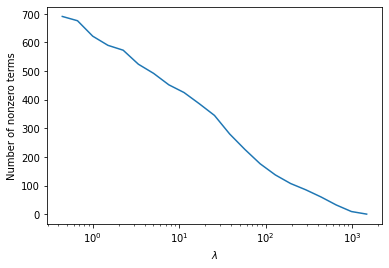

In [85]:

print(lam_list)
print(num_nonzero_list)
plt.plot(lam_list, num_nonzero_list)
plt.xlabel(r'$\lambda$')
plt.ylabel('Number of nonzero terms')
plt.xscale('log')

In [ ]:
# print(w.shape)
# print(x.shape)
# print(x)
# print(w.T@x)
# b = np.mean(y - np.sum(w.T@x))
# print(b)

print(y.shape)
print(b.shape)
print(sum(w.T@x).shape)
print(sum(np.multiply(w.T, np.diagonal(x))).shape)
print(np.sum(np.multiply(w.T, np.diagonal(x))))


In [ ]:
np.multiply(w.T, np.diagonal(x))
# np.diagonal(x)
# w